## Table of Contents
* [Convolutions](#convolutions)
* [Pooling](#pooling)
* [OneByOne Convolution](#one_by_one_convolutions)
* [Depthwise separable convolution](#depthwise_convolution)
* [Inverted residual block](#inverted_residual_block)
* [MobileNetV2](#mobilenetv2)
* [Transposed Convolutions](#transposed_convolutions)

### Convolutions <a id="convolutions"></a>
Convolution is a mathematical operation that combines two functions to produce a third function. In the context of computer vision, the convolution operation involves sliding a filter (also known as a kernel) over an image to produce a feature map.

**Key components:**
1. Image (Input Matrix):
    - A 2D array (or matrix) of pixel values representing the input image. For a grayscale image, it's a single matrix. For a color image, it's a 3D matrix with depth corresponding to the color channels (RGB).
2. Kernel (Filter):
    - A smaller 2D matrix of weights (e.g., 3x3, 5x5) that is used to scan the image. The filter's purpose is to detect specific features such as edges, textures, or patterns.
3. Feature Map (Output Matrix):
    - The result of the convolution operation, which highlights the presence of specific features in the input image.

**Convolution Process:**
1. Sliding the Filter:
    - The filter is moved across the image in a sliding window fashion, starting from the top-left corner to the bottom-right corner.
2. Element-wise Multiplication:
    - For each position of the filter on the image, element-wise multiplication is performed between the filter and the corresponding image patch.
3. Summation:
    - The results of the element-wise multiplication are summed up to produce a single value, which is placed in the corresponding position of the feature map.
4. Stride and Padding:
    - Stride: Determines how much the filter moves at each step. A stride of 1 means the filter moves one pixel at a time. A larger stride results in a smaller feature map.
    - Padding: Adds a border of zeros around the image to control the size of the feature map. Without padding, the feature map becomes smaller than the input image. Padding helps preserve the spatial dimensions.

#### Example
Consider a 3x3 filter and a 5x5 image:

Filter: 

1  0  -1<br/>
1  0  -1<br/>
1  0  -1<br/>

Image:

3  4  1  2  5 <br/>
5  6  2  1  3 <br/>
1  2  3  4  6 <br/>
6  7  5  4  2 <br/>
3  2  1  6  5 <br/>

Place the filter on the top-left corner of the image.Perform element-wise multiplication and sum the results:

(3x1 + 4x0 + 1x(-1)) + (5x1 + 6x0 + 2x(-1)) + (1x1 + 2x0 + 3x(-1)) <br/>
= 3 + 0 - 1 + 5 + 0 - 2 + 1 + 0 - 3 <br/>
= 3 - 1 + 5 - 2 + 1 - 3 <br/>
= 3 <br/>

Move the filter to the right by one pixel (stride = 1) and repeat the process until the entire image is covered.

**Formula to Calculate Output Dimensions**

Given an input image of size $n \times n$ (with $n$ being the height and width of the image), a filter (kernel) of size $f \times f$, a stride $s$, and padding $p$, the dimensions $O \times O$ of the output feature map can be calculated using the formula:

$$
O = \frac{(n - f + 2p)}{s} + 1
$$

Where:
- $O$ = the output dimension (height and width, assuming square output).
- $n$ = input size (height and width of the input).
- $f$ = filter size (height and width of the filter).
- $p$ = padding (the number of zero pixels added around the input to maintain spatial dimensions).
- $s$ = stride (the number of pixels by which the filter is moved during the convolution).

**Example:**
If you have an input image of size $32 \times 32$, a filter of size $5 \times 5$, stride $1$, and padding $2$, then:

$$
O = \frac{(32 - 5 + 2 \times 2)}{1} + 1 = \frac{(32 - 5 + 4)}{1} + 1 = \frac{31}{1} + 1 = 32
$$

**Valid vs. Same Convolutions**

1. **Valid Convolution:**
   - In a **valid** convolution, no padding is applied to the input image. This means the filter only slides within the input dimensions, without extending beyond the edges.
   - In this case, $p = 0$.
   - Output size decreases after applying the convolution, depending on the filter size and stride.
   
   Formula for output size in valid convolution:
   $$
   O = \frac{n - f}{s} + 1
   $$

   Example: If $n = 32$, $f = 5$, $s = 1$, and $p = 0$ (valid convolution), then:
   $$
   O = \frac{(32 - 5)}{1} + 1 = 28
   $$
   The output size is $28 \times 28$.

2. **Same Convolution:**
   - In a **same** convolution, the goal is to preserve the input size after convolution. This is done by adding padding around the input image so that the output dimensions are the same as the input.
   - Padding $p$ is typically calculated to achieve this.
   - For a stride $s = 1$, the padding is:
     $$
     p = \frac{f - 1}{2}
     $$
   - In this case, the output dimensions will be the same as the input.

   Example: If $n = 32$, $f = 5$, and $s = 1$, for a **same** convolution:
   $$
   p = \frac{5 - 1}{2} = 2
   $$
   Applying this padding will give you the same output size as the input, $32 \times 32$.

### Pooling <a id="pooling"></a>

In Convolutional Neural Networks (CNNs), **pooling** is an operation used to reduce the spatial dimensions (height and width) of the input feature map while retaining important information. Pooling helps in making the network computationally efficient, reduces the chances of overfitting, and provides spatial invariance.

### Types of Pooling:

1. **Max Pooling**: 
   - It selects the maximum value from the region of the input that the filter covers.
   - It captures the most prominent feature in a specific region.

2. **Average Pooling**: 
   - It calculates the average of all values in the region that the filter covers.
   - It smoothens the feature map, giving an average representation.

### Pooling Operation:

In a pooling operation, a filter (or pooling window) of size $f \times f$ slides over the input feature map, aggregating values within that region based on the type of pooling (max or average). The filter is applied with a stride $s$ (step size), similar to convolution operations, and optionally padding $p$ can be used.

### Formula to Calculate Output Dimensions

Given an input image of size $n \times n$ (with $n$ being the height and width of the image), a pooling filter of size $f \times f$, a stride $s$, and padding $p$, the dimensions $O \times O$ of the output feature map after the pooling operation can be calculated as:

$$
O = \frac{(n - f + 2p)}{s} + 1
$$

Where:
- $O$ = output size (height and width).
- $n$ = input size (height and width of the input).
- $f$ = filter (pooling window) size.
- $p$ = padding (the number of zero pixels added around the input).
- $s$ = stride (the number of pixels by which the pooling window is moved during pooling).

### Example:

If you have an input feature map of size $32 \times 32$, a pooling filter of size $2 \times 2$, stride $2$, and no padding ($p = 0$), then the output dimensions would be:

$$
O = \frac{(32 - 2 + 2 \times 0)}{2} + 1 = \frac{30}{2} + 1 = 16
$$

So the output size after pooling will be $16 \times 16$.

### Key Points:
- Pooling reduces the spatial size of the feature maps but retains important information, making the network more efficient.
- **Max Pooling** is the most commonly used pooling operation in CNNs as it helps to highlight important features while discarding less important ones.
- Pooling also contributes to reducing overfitting by down-sampling the input, and providing spatial invariance (small shifts in the input will not significantly affect the output).


### 1x1 convolution <a id="one_by_one_convolutions"></a>

A 1x1 convolution is a special type of convolution operation where the filter size is 1x1. This means it doesn't consider the spatial relationships between pixels, but instead operates on a per-pixel basis across all channels of the input feature map.

How it Works
- The 1x1 filter slides over the input feature map, but since it's 1x1, it only covers a single pixel at a time.
- For each pixel, the filter multiplies its weights with the corresponding values in all channels of the input feature map and sums the results to produce a single output value. Given an input feature map of dimensions H x W x C_in (height, width, and number of input channels), and a filter of size    1 x 1 x C_in x C_out (1x1 spatial dimension, C_in input channels and C_out output channels), the output feature map will have dimensions H x W x C_out
- This process is repeated for all pixels in the input feature map, resulting in an output feature map with the same spatial dimensions but potentially a different number of channels.

Use Cases

1. Dimensionality Reduction:
    - By using fewer output channels than input channels, a 1x1 convolution can reduce the feature map depth, making the network more efficient.This reduction in dimensionality acts as a compression point, forcing the network to extract the most essential features from the previous layers. The compression process can also act as a form of regularization, preventing overfitting.
2. Linear Projection:
    - 1x1 convolutions can be seen as linear projections of the input feature maps. This allows for learning complex transformations between input and output channels. Replace fully connected layers with 1 x 1 convolutions as Yann LeCun believes they are the same.
3. Non-Linearity: 
    - If we have specified the number of 1 x 1 Conv filters to be the same as the input number of channels then the output will contain the same number of channels. Then the 1 x 1 Conv will act like a non linearity. It introduces non-linearity when followed by an activation function like ReLU, enabling more complex representations.
4. Network-in-Network (NIN) Architecture:
    - In the Network-in-Network architecture, 1x1 convolutions are used to replace fully connected layers, enabling the network to be fully convolutional. This improves spatial generalization and reduces the number of parameters.
5. Inception Modules:
    - Inception modules use 1x1 convolutions to reduce the number of input channels before applying larger convolutions (3x3, 5x5). This helps control the computational cost and the number of parameters in the network.
6. Dimensionality Reduction and Bottleneck Layers:
    - 1x1 convolutions are used in bottleneck layers to reduce the number of channels, making the network more efficient. This is common in architectures like ResNet. 
    - For example, in a ResNet bottleneck block, a 1x1 convolution reduces the dimensionality before a 3x3 convolution, and another 1x1 convolution restores the original dimensionality.


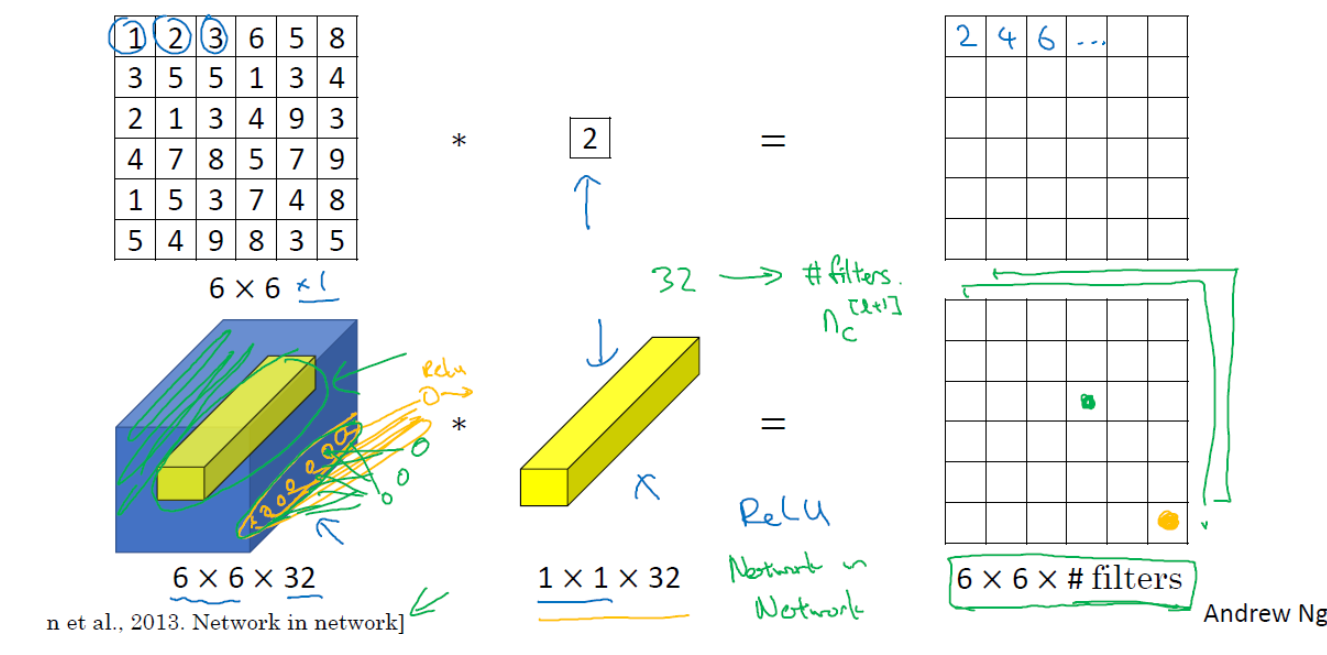

### **Depthwise separable convolution** <a id="depthwise_convolution"></a>

A depthwise separable convolution is a type of convolution operation used in deep learning that reduces the computational cost and number of parameters compared to traditional convolution operations. It's particularly useful in mobile and embedded applications where resources are limited.

#### Traditional convolution

In a traditional 2D convolution operation:

**Input:** We have an input tensor (e.g., an image) with dimensions (H, W, C_in) where H = height, W= width, and C_in = number of input channels.

**Filters:** We have a set of filters (also called kernels) with dimensions (K, K, C_in, C_out) where K = kernel size, C_in = number of input channels, and C_out = number of output channels.

**Output:** The output tensor has dimensions (H', W', C_out) where H' and W' depend on the stride and padding

The traditional convolution operation involves sliding each filter across the input tensor and computing the dot product between the filter and the corresponding input region. This process is repeated for all filters, and the results are stacked together to form the output tensor.

#### Depthwise separable convolution
Depthwise separable convolution breaks down the traditional convolution into two separate operations: depthwise convolution and pointwise convolution.

1. Depthwise convolution: 
    - In this step, each filter is applied to a single input channel independently. Instead of having filters that span all input channels, we have C_in filters each of size (K, K, 1)
    - Each filter is convolved with its corresponding input channel, resulting in an output with the same number of channels as the input C_in
    - This reduces the computation significantly because we no longer have to convolve across all input channels.

2. Pointwise convolution:
    - After the depthwise convolution, we perform a pointwise convolution using 1x1 filters (1x1 convolution). Each 1x1xC_in filter operates on the entire depth of the input tensor.
    - The number of 1x1 filters equals to C_out, so the output tensor has C_out channels.


Advantages of Depthwise Separable Convolution:
- Reduced number of parameters: Significantly fewer parameters compared to standard convolutions.
- Improved computational efficiency: Faster training and inference due to reduced computations.
- Better performance: In some cases, depthwise separable convolutions can achieve comparable or even better performance than standard convolutions.

### **Inverted residual block** <a id="inverted_residual_block"></a>

The inverted residual block is a building block introduced in the MobileNetV2 architecture, which aims to enhance the efficiency and performance of deep neural networks, especially for mobile and edge devices. The main idea is to invert the standard residual block structure by expanding the number of channels first and then reducing it.

Key Concepts:
1. Depthwise Separable Convolution: This involves a depthwise convolution followed by a pointwise convolution. It's efficient because it significantly reduces the number of parameters and computations compared to a standard convolution.

2. Bottleneck Design: The inverted residual block uses a bottleneck design where the number of channels is first expanded and then compressed. This is the "inverted" part compared to traditional residual blocks where the channels are usually compressed first.

3. Residual Connection: The block includes a residual connection between the input and output, similar to traditional residual blocks in ResNet. This helps in training very deep networks by mitigating the vanishing gradient problem.

4. Non-linearity: The non-linearity (usually ReLU6) is applied only after the pointwise convolution to maintain the representational power of the block.

Structure of an Inverted Residual Block:

- Pointwise Convolution (1x1): Expands the number of channels.
- Depthwise Convolution (3x3): Applies convolution independently to each channel.
- Pointwise Convolution (1x1): Compresses the number of channels back.
- Residual Connection: Adds the input to the output if the number of channels and spatial dimensions match.

In [ ]:
import torch
import torch.nn as nn

class InvertedResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride, expansion_factor):
        super(InvertedResidualBlock, self).__init__()
        self.stride = stride
        self.use_residual = (self.stride == 1 and in_channels == out_channels)

        hidden_dim = in_channels * expansion_factor
        self.expand_conv = nn.Conv2d(in_channels, hidden_dim, kernel_size=1, bias=False)
        self.expand_bn = nn.BatchNorm2d(hidden_dim)
        self.expand_relu = nn.ReLU6(inplace=True)

        self.depthwise_conv = nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=stride, padding=1, groups=hidden_dim, bias=False)
        self.depthwise_bn = nn.BatchNorm2d(hidden_dim)
        self.depthwise_relu = nn.ReLU6(inplace=True)

        self.project_conv = nn.Conv2d(hidden_dim, out_channels, kernel_size=1, bias=False)
        self.project_bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        identity = x

        out = self.expand_conv(x)
        out = self.expand_bn(out)
        out = self.expand_relu(out)

        out = self.depthwise_conv(out)
        out = self.depthwise_bn(out)
        out = self.depthwise_relu(out)

        out = self.project_conv(out)
        out = self.project_bn(out)

        if self.use_residual:
            out += identity

        return out

# Example usage
if __name__ == "__main__":
    # Example input tensor with batch size 1, 32 channels, 32x32 spatial dimensions
    x = torch.randn(1, 32, 32, 32)

    # Inverted residual block with:
    # - 32 input channels
    # - 64 output channels
    # - Stride of 1
    # - Expansion factor of 6
    block = InvertedResidualBlock(32, 64, stride=1, expansion_factor=6)

    # Forward pass
    y = block(x)
    print(y.shape)  # Should output torch.Size([1, 64, 32, 32])


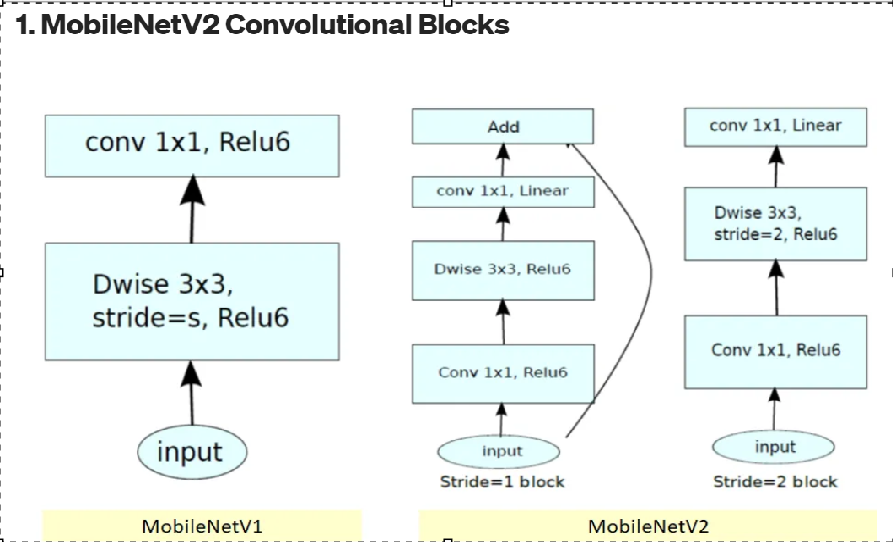

### **MobileNetV2** <a id="mobilenetv2"></a>

In MobileNetV2, there are two types of blocks. One is inverted residual block also called BottleNeck block with stride of 1. Another one is BottleNeck block with stride of 2 for downsizing.

There are 3 layers for both types of blocks:

- the first layer is 1×1 convolution (expansion layer) that expands the number of channels with ReLU6.
- second layer is the depthwise convolution.
- The third layer is another 1×1 convolution (pointwise convolution) that compresses the number of channels but without any non-linearity.

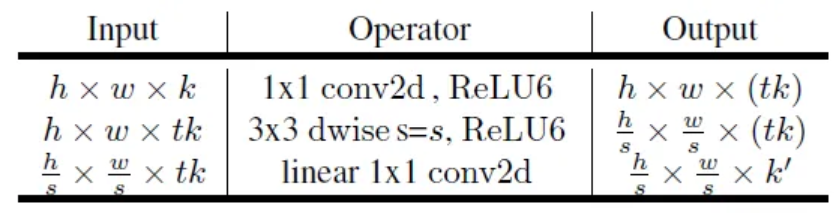

- t = expansion factor (typically 6) for first 1x1 layer
- s = stride
- k = number of input channels
- tk = hidden dim = number of hidden channels used internally by the layers
- k' = number of output channels

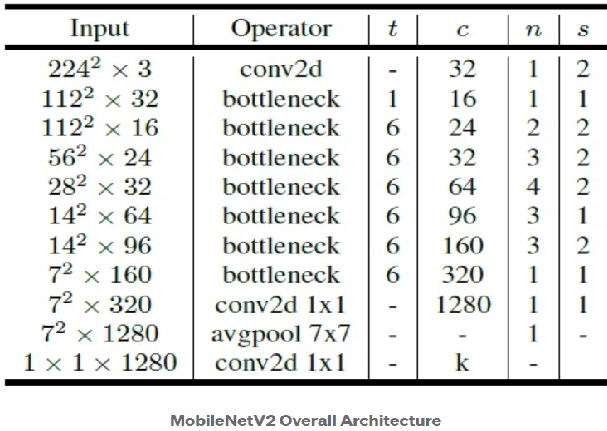

- n = number of inverted residual blocks
- c = number of output channels
- s = stride
- 3×3 kernels are used for spatial convolution (depthwise convolution).

## Transposed Convolution in CNNs <a id="transposed_convolutions"></a>

A **transposed convolution** (also called **deconvolution** or **upconvolution**) is an operation used in convolutional neural networks (CNNs) primarily for **upsampling**—i.e., increasing the spatial resolution of the input (height and width) to generate a larger output image. It is commonly used in generative models, such as autoencoders and GANs, and in segmentation tasks, where we need to go from a compressed, smaller representation back to a larger, more detailed output.

### How Transposed Convolution Works

A **regular convolution** reduces the spatial dimensions of the input. For example, a convolution layer might take an image of size $n \times n$ and, using a filter with a specified stride and padding, produce an output with smaller dimensions. A **transposed convolution**, on the other hand, performs the reverse operation: it increases the spatial resolution of the input.

Instead of directly upsampling the image using methods like nearest neighbors or bilinear interpolation, transposed convolution learns how to upsample through a set of learnable filters (like a regular convolution but in reverse).

### Transposed Convolution Process

Here is how a transposed convolution works at a high level:
1. **Stride and Padding**: Instead of sliding a filter over an image like in regular convolution, we start with a smaller output and place a filter (also called a **kernel**) on each element of the input. Stride and padding control how much the spatial resolution increases.
2. **Upsampling**: The kernel spreads out the values from the smaller input over a larger output space based on the strides and padding.
3. **Learnable Weights**: Just like in regular convolutions, transposed convolution uses learnable filters that determine how the pixels are combined when upsampling.

### Formula to Calculate Output Dimensions

The output dimensions $H_{\text{out}} \times W_{\text{out}}$ of a transposed convolution are given by:

$$
H_{\text{out}} = (H_{\text{in}} - 1) \times \text{stride} - 2 \times \text{padding} + \text{kernel size} + \text{output padding}
$$

$$
W_{\text{out}} = (W_{\text{in}} - 1) \times \text{stride} - 2 \times \text{padding} + \text{kernel size} + \text{output padding}
$$

Where:
- $H_{\text{in}}, W_{\text{in}}$: Input height and width.
- **stride**: How far the filter is moved each time.
- **kernel size**: Size of the filter (e.g., 3x3).
- **padding**: Zeros added around the input.
- **output padding**: Optional additional padding applied to the output (not often used but helpful in certain cases to control exact size).

### Example

Suppose you have:
- **Input dimensions**: 2x2
- **Kernel size**: 3x3
- **Stride**: 2
- **Padding**: 0
- **Output padding**: 0

The output dimensions will be:

$$
H_{\text{out}} = (2 - 1) \times 2 - 2 \times 0 + 3 + 0 = 5
$$
$$
W_{\text{out}} = (2 - 1) \times 2 - 2 \times 0 + 3 + 0 = 5
$$

So, the output will be a 5x5 feature map.

### Difference from Regular Convolution

- **Convolution**: Reduces spatial dimensions (downsampling).
- **Transposed Convolution**: Increases spatial dimensions (upsampling).

### Valid vs. Same Transposed Convolutions

- **Same Transposed Convolution**: Produces an output of the same size as the input when strides and padding are chosen appropriately.
- **Valid Transposed Convolution**: No padding is added, so the output size strictly depends on the kernel size and stride.

### Use Cases of Transposed Convolutions

1. **Autoencoders**: To reconstruct an input image from a compressed latent space.
2. **Generative Adversarial Networks (GANs)**: To generate high-resolution images from a low-dimensional latent space.
3. **Segmentation Tasks**: To map back from feature maps to full-resolution segmentation masks.

### Summary

- **Transposed Convolution**: A learnable operation used for upsampling.
- **Output Dimensions**: Depend on stride, kernel size, padding, and optional output padding.
- **Applications**: Used in tasks requiring upsampling, like image reconstruction, generation, or segmentation.

This operation allows CNNs to learn the best way to upscale feature maps during tasks that require increasing spatial dimensions.
